# Clustering

## Agenda:

1. K-means clustering
2. Clustering evaluation
3. DBSCAN clustering

In [1]:
# beer dataset
import pandas as pd
url = '../data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


How would you cluster these beers?

In [2]:
# define X
X = beer.drop('name', axis=1)

What happened to y?

## Part 1: K-means clustering

In [3]:
# K-means with 3 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [4]:
# review the cluster labels
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1], dtype=int32)

In [5]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort('cluster')

/Users/thakurs/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0


What do the clusters seem to be based on? Why?

In [6]:
# review the cluster centers
km.cluster_centers_

array([[ 150.        ,   17.        ,    4.52142857,    0.52071429],
       [ 102.75      ,   10.        ,    4.075     ,    0.44      ],
       [  70.        ,   10.5       ,    2.6       ,    0.42      ]])

In [7]:
# calculate the mean of each feature for each cluster
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


In [8]:
# save the DataFrame of cluster centers
centers = beer.groupby('cluster').mean()

In [9]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [10]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])


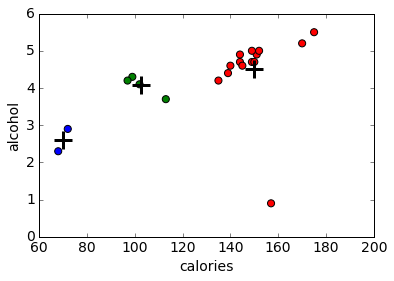

In [11]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[list(beer.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1176bf810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11977e4d0>]], dtype=object)

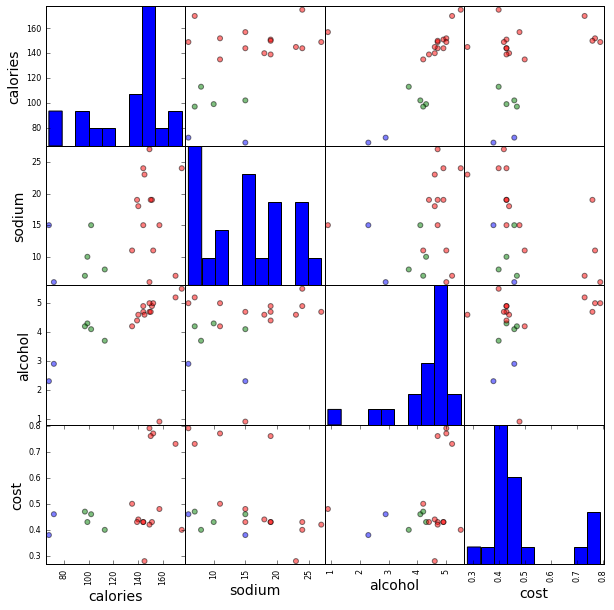

In [12]:
# scatter plot matrix (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[list(beer.cluster)], figsize=(10,10), s=100)

### Repeat with scaled data

In [13]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [15]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort('cluster')

/Users/thakurs/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1


What are the "characteristics" of each cluster?

In [16]:
# review the cluster centers
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,148.375,21.125,4.7875,0.4075
1,105.375,10.875,3.3250,0.4475
2,155.250,10.750,4.9750,0.7625


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1198b5a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b17ac50>]], dtype=object)

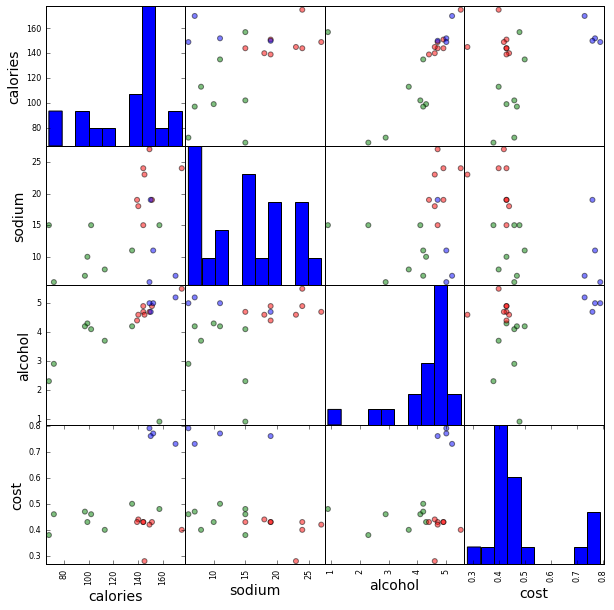

In [17]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[list(beer.cluster)], figsize=(10,10), s=100)

Do you notice any cluster assignments that seem a bit odd? How might we explain those?

## Part 2: Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

In [18]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.45777415910909475

In [19]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(X, km.labels_)

0.17978068089400071

In [20]:
# calculate SC for K=2 through K=19
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

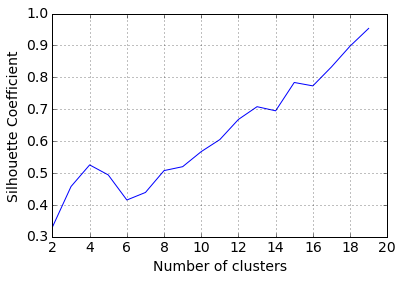

In [21]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [32]:
# K-means with 4 clusters on scaled data
km = KMeans(n_clusters=4, random_state=1)
km.fit(X_scaled)
beer['cluster'] = km.labels_
beer.sort('cluster')

/Users/sinanozdemir/anaconda/envs/sfdat28/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1


## Part 3: DBSCAN clustering

In [33]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=3, p=None, random_state=None)

In [34]:
# review the cluster labels
db.labels_

array([ 0,  0, -1,  1,  1, -1, -1,  0,  2,  2,  0,  2,  0, -1,  1, -1,  0,
        0, -1,  2])

In [35]:
# save the cluster labels and sort by cluster
beer['cluster'] = db.labels_
beer.sort('cluster')

/Users/sinanozdemir/anaconda/envs/sfdat28/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,name,calories,sodium,alcohol,cost,cluster
2,Lowenbrau,157,15,0.9,0.48,-1
5,Old_Milwaukee,145,23,4.6,0.28,-1
6,Augsberger,175,24,5.5,0.40,-1
18,Olympia_Goled_Light,72,6,2.9,0.46,-1
13,Becks,150,19,4.7,0.76,-1
15,Pabst_Extra_Light,68,15,2.3,0.38,-1
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


In [36]:
# review the cluster centers
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
-1,127.833333,17.0,3.483333,0.460000
0,143.142857,19.0,4.628571,0.440000
1,157.000000,8.0,5.066667,0.763333
2,102.750000,10.0,4.075000,0.440000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11893dc90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a795390>]], dtype=object)

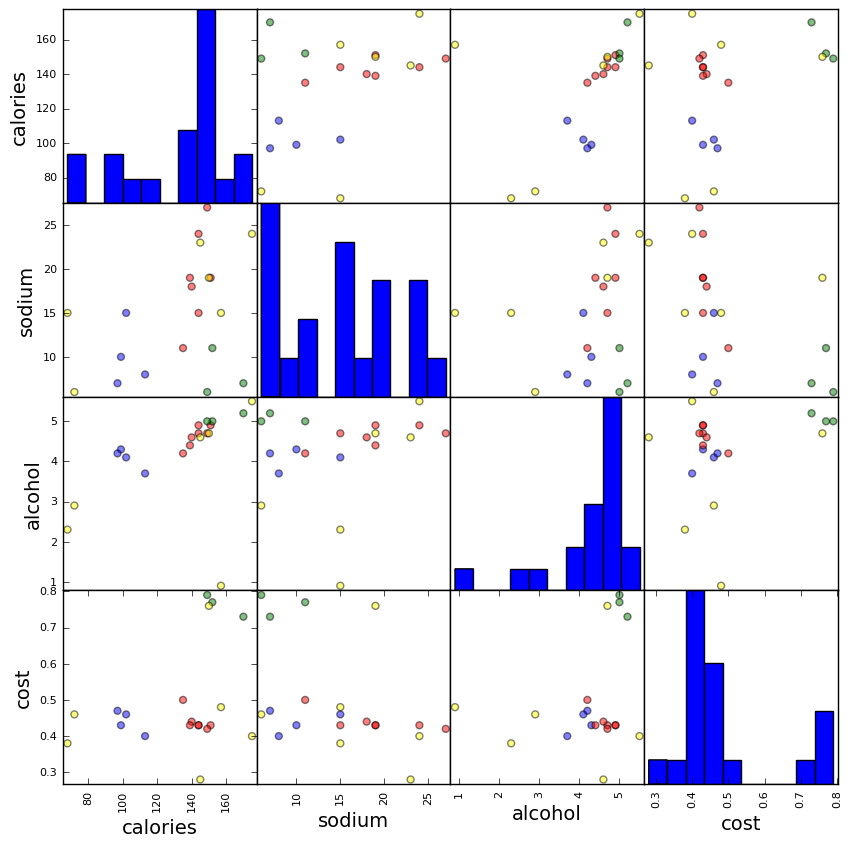

In [37]:
# scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
pd.scatter_matrix(X, c=colors[list(beer.cluster)], figsize=(10,10), s=100)

In [38]:
# Silhousette Coefficient also works on DBSCAN
metrics.silhouette_score(X_scaled, db.labels_)

0.23754067391520689

In [39]:
# calculate SC for K=2 through K=19
eps_range = range(1, 10)
scores = []
for k in eps_range:
    db = DBSCAN(eps=k, min_samples=3)
    db.fit(X_scaled)
    if len(set(db.labels_)) > 1:
        scores.append(metrics.silhouette_score(X_scaled, db.labels_))
    else:
        scores.append(0)

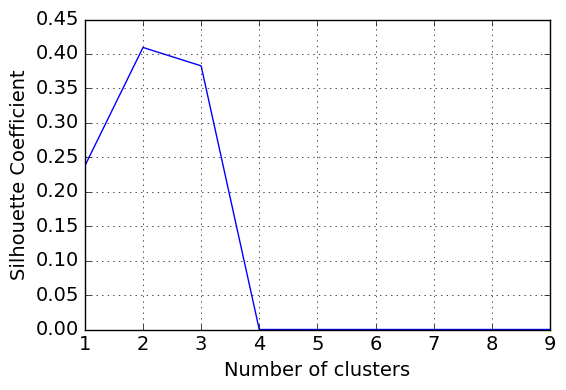

In [40]:
# plot the results
plt.plot(eps_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(l)

/Users/sinanozdemir/anaconda/envs/sfdat28/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/sinanozdemir/anaconda/envs/sfdat28/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/sinanozdemir/anaconda/envs/sfdat28/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/sinanozdemir/anaconda/envs/sfdat28/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWa

array([ -0.03162278,  -0.03162278,  -0.03162278, ...,  -0.03162278,
        -0.03162278,  31.6227766 ])

In [46]:
#  topic modelling for news

In [47]:
from sklearn.datasets import fetch_20newsgroups
# adapted in http://alexperrier.github.io/jekyll/update/2015/09/16/segmentation_twitter_timelines_lda_vs_lsa.html

In [48]:
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# grab only four topics of articles
dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

In [49]:
dataset.data[0]

u'From: healta@saturn.wwc.edu (Tammy R Healy)\nSubject: Re: who are we to judge, Bobby?\nLines: 38\nOrganization: Walla Walla College\nLines: 38\n\nIn article <1993Apr14.213356.22176@ultb.isc.rit.edu> snm6394@ultb.isc.rit.edu (S.N. Mozumder ) writes:\n>From: snm6394@ultb.isc.rit.edu (S.N. Mozumder )\n>Subject: Re: who are we to judge, Bobby?\n>Date: Wed, 14 Apr 1993 21:33:56 GMT\n>In article <healta.56.734556346@saturn.wwc.edu> healta@saturn.wwc.edu (TAMMY R HEALY) writes:\n>>Bobby,\n>>\n>>I would like to take the liberty to quote from a Christian writer named \n>>Ellen G. White.  I hope that what she said will help you to edit your \n>>remarks in this group in the future.\n>>\n>>"Do not set yourself as a standard.  Do not make your opinions, your views \n>>of duty, your interpretations of scripture, a criterion for others and in \n>>your heart condemn them if they do not come up to your ideal."\n>>                         Thoughts Fromthe Mount of Blessing p. 124\n>>\n>>I hope quoting

In [50]:
labels = dataset.target  # actual targets

In [51]:
labels[0]

0

In [52]:
dataset.target_names  # target names, the above text is about atheism

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [53]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
# use a normalizer module to normalize data for KMeans which is affected by scale

vect = TfidfVectorizer(stop_words='english')  # vectorize the data
normal = Normalizer(copy=False)               # normalize the vectorized data
km = KMeans(n_clusters=4, random_state=1)     # cluster

feature_preprocessing = Pipeline(steps=(('vect', vect), ('normal', normal)))
pipe = Pipeline(steps=(('preprocess', feature_preprocessing), ('cluster', km)))

In [54]:
pipe.fit(dataset.data)

Pipeline(steps=(('preprocess', Pipeline(steps=(('vect', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', pre..., n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0))))

In [55]:
predicted_topics = pipe.steps[1][1].labels_

In [56]:
predicted_topics

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [57]:
[dataset.target_names[p] for p in labels][:5]  # the kmeans labels as words

['alt.atheism',
 'comp.graphics',
 'comp.graphics',
 'talk.religion.misc',
 'comp.graphics']

In [58]:
df = pd.DataFrame({'text':dataset.data, 'cluster':predicted_topics, 'actual': [dataset.target_names[p] for p in labels]})

In [59]:
# Make a readable dataframe

df.head()

,actual,cluster,text
0,alt.atheism,2,From: healta@saturn.wwc.edu (Tammy R Healy)\nS...
1,comp.graphics,0,From: jk87377@lehtori.cc.tut.fi (Kouhia Juhana...
2,comp.graphics,0,Subject: PHIGS User Group Conference\nFrom: ha...
3,talk.religion.misc,2,From: joslin@pogo.isp.pitt.edu (David Joslin)\...
4,comp.graphics,0,From: adaptive@cs.nps.navy.mil (zyda res acct)...


In [60]:
from sklearn.feature_extraction.text import CountVectorizer
smaller_tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
for cluster in range(4):
    print cluster, df[df.cluster==cluster].actual.value_counts()
    matrix = smaller_tfidf.fit_transform(df[df.cluster==cluster].text)
    freqs = [(word, matrix.getcol(idx).sum()) for word, idx in smaller_tfidf.vocabulary_.items()]
    #sort from largest to smallest
    print [k for k in sorted (freqs, key = lambda x: -x[1])[:10]]
    print
    print

0 sci.space             981
comp.graphics         967
talk.religion.misc     98
alt.atheism            39
Name: actual, dtype: int64
[(u'edu', 151.63509563077946), (u'com', 90.216278296903027), (u'space', 80.419778405466076), (u'subject', 70.247054094339632), (u'lines', 69.702810840447825), (u'organization', 68.572782997429101), (u'university', 60.657433099907635), (u'writes', 57.332729898666514), (u'posting', 56.328153056409299), (u'host', 54.311826413323004)]


1 talk.religion.misc    70
alt.atheism           37
Name: actual, dtype: int64
[(u'sandvik', 11.493184744306847), (u'com', 8.4194395112546587), (u'kent', 7.2687834960860602), (u'apple', 6.9149944738576314), (u'edu', 6.078429458367995), (u'newton', 5.8113837266689794), (u'god', 5.0984586698095988), (u'jesus', 4.247570931776754), (u'article', 4.0865421128808137), (u'people', 3.9007828500661419)]


2 alt.atheism           588
talk.religion.misc    448
sci.space               6
comp.graphics           6
Name: actual, dtype: int64


In [61]:
# output the Silhouette score, oof

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(feature_preprocessing.fit_transform(dataset.data), pipe.steps[1][1].labels_))

Silhouette Coefficient: 0.006


In [62]:
# LSA -- Latent Semantic Analysis

# LSA is a vector-based dimension reduction technique 
# that allows to project a large feature space to a smaller one

# It is a tfidf vectorizer that is then put through an svd and finally normalized
# before being put through a kmeans clustering

In [68]:
from time import time

vect = TfidfVectorizer(stop_words='english')
lsa = make_pipeline(vect, Normalizer(copy=False))

X_tfidfd = lsa.fit_transform(dataset.data)
t0 = time()

km = KMeans(n_clusters=4, random_state=1)

print("Clustering sparse data with %s" % km)
km.fit(X_tfidfd)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_tfidfd, km.labels_))
print (time()-t0), 'seconds'

Clustering sparse data with KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)
Silhouette Coefficient: 0.006
10.4996438026 seconds


In [69]:
from sklearn.decomposition import TruncatedSVD
# we will be using SVD as our dimension reduction technique and a normalizer to normalize data (for KMeans)

In [70]:
vect = TfidfVectorizer(stop_words='english')
svd = TruncatedSVD(n_components=5)
lsa = make_pipeline(vect, svd, Normalizer(copy=False))

X_lsa = lsa.fit_transform(dataset.data)

In [71]:
X_lsa.shape  # fewer columns

(3387, 5)

In [72]:
t0 = time()
km = KMeans(n_clusters=4, random_state=1)

print("Clustering sparse data with %s" % km)
km.fit(X_lsa)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_lsa, km.labels_))
print (time()-t0), 'seconds'

Clustering sparse data with KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)
Silhouette Coefficient: 0.395
2.04890608788 seconds


In [73]:
km.labels_

array([1, 0, 0, ..., 2, 0, 0], dtype=int32)

In [74]:
labels

array([0, 1, 1, ..., 2, 1, 1])

In [78]:
# try a bunch of components, look at the scores below

for n_components in (5, 10, 25, 50, 100):
    vect = TfidfVectorizer(stop_words='english')
    svd = TruncatedSVD(n_components=n_components)
    lsa = make_pipeline(vect, svd, Normalizer(copy=False))

    X_lsa = lsa.fit_transform(dataset.data)
    km = KMeans(n_clusters=4, random_state=1)

    print("Clustering sparse data with %s components" % n_components)
    km.fit(X_lsa)
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X_lsa, km.labels_))

Clustering sparse data with 5 components
Silhouette Coefficient: 0.400
Clustering sparse data with 10 components
Silhouette Coefficient: 0.290
Clustering sparse data with 25 components
Silhouette Coefficient: 0.132
Clustering sparse data with 50 components
Silhouette Coefficient: 0.065
Clustering sparse data with 100 components
Silhouette Coefficient: 0.038


In [79]:
dataset.data[0]

u'From: healta@saturn.wwc.edu (Tammy R Healy)\nSubject: Re: who are we to judge, Bobby?\nLines: 38\nOrganization: Walla Walla College\nLines: 38\n\nIn article <1993Apr14.213356.22176@ultb.isc.rit.edu> snm6394@ultb.isc.rit.edu (S.N. Mozumder ) writes:\n>From: snm6394@ultb.isc.rit.edu (S.N. Mozumder )\n>Subject: Re: who are we to judge, Bobby?\n>Date: Wed, 14 Apr 1993 21:33:56 GMT\n>In article <healta.56.734556346@saturn.wwc.edu> healta@saturn.wwc.edu (TAMMY R HEALY) writes:\n>>Bobby,\n>>\n>>I would like to take the liberty to quote from a Christian writer named \n>>Ellen G. White.  I hope that what she said will help you to edit your \n>>remarks in this group in the future.\n>>\n>>"Do not set yourself as a standard.  Do not make your opinions, your views \n>>of duty, your interpretations of scripture, a criterion for others and in \n>>your heart condemn them if they do not come up to your ideal."\n>>                         Thoughts Fromthe Mount of Blessing p. 124\n>>\n>>I hope quoting